<a href="https://colab.research.google.com/github/NancyJV26/CodigosPython/blob/main/ANALISIS_02_JIMENEZ_VAZQUEZ_NANCY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
#Subir archivos de Synergy
from google.colab import files
files.upload()

{}

In [15]:
#Bibliotecas que se ocupan
import pandas as pd
import matplotlib.pyplot as plt
datos = pd.read_csv("synergy_logistics_database.csv")

In [17]:
exportacion = datos[datos['direction']== 'Exports']
importacion = datos[datos['direction']== 'Imports']
gtotal=datos['total_value'].sum()
gtotal

215691298000

Parte 1: Rutas de Exportación e Importación

Top 10 Rutas de Exportación

In [31]:
r_total = datos.groupby(['direction','origin','destination','transport_mode'])
suma = r_total.sum()['total_value']
r_total = r_total['total_value'].describe()
r_total['suma_t'] = suma
r_total = r_total.reset_index()

In [33]:
#rutas de exportaciones
r_exportacion = r_total[r_total['direction']=='Exports']
top_exportacion= r_exportacion.sort_values(by='count',ascending=False).head(10)
top_exportacion.to_excel('Toprutas_exportaciones.xlsx')
top_exportacion

,direction,origin,destination,transport_mode,count,mean,std,min,25%,50%,75%,max,suma_t
134,Exports,South Korea,Vietnam,Sea,497.0,1.383704e+07,1.071060e+07,0.0,6000000.0,11000000.0,18000000.0,65000000.0,6877007000
154,Exports,USA,Netherlands,Sea,436.0,2.367401e+06,3.425529e+06,0.0,1000.0,4000.0,4000000.0,23000000.0,1032187000
108,Exports,Netherlands,Belgium,Road,374.0,8.636615e+06,1.787992e+07,0.0,1000.0,3000000.0,7000000.0,229000000.0,3230094000
34,Exports,China,Mexico,Air,330.0,3.712121e+07,2.582412e+07,0.0,19000000.0,35000000.0,52000000.0,140000000.0,12250000000
86,Exports,Japan,Brazil,Sea,306.0,1.100704e+07,1.115415e+07,0.0,1000000.0,8000000.0,17000000.0,52000000.0,3368155000
57,Exports,Germany,France,Road,299.0,9.706401e+06,1.577356e+07,0.0,2000.0,3000000.0,10000000.0,88000000.0,2902214000
131,Exports,South Korea,Japan,Sea,279.0,1.646595e+07,8.336327e+06,2000000.0,10000000.0,15000000.0,20500000.0,45000000.0,4594000000
3,Exports,Australia,Singapore,Sea,273.0,1.805861e+06,1.607325e+06,0.0,1000000.0,1000000.0,2000000.0,12000000.0,493000000
25,Exports,Canada,Mexico,Rail,261.0,3.237548e+07,2.433130e+07,0.0,11000000.0,31000000.0,49000000.0,103000000.0,8450000000
38,Exports,China,Spain,Air,250.0,7.448000e+06,9.225385e+06,0.0,2000000.0,4000000.0,8000000.0,54000000.0,1862000000


Top 10 Rutas de Importación

In [34]:
r_importacion = r_total[r_total['direction']=='Imports']
top_importacion= r_importacion.sort_values(by='count',ascending=False).head(10)
top_importacion.to_excel('Toprutas_importaciones.xlsx')
top_importacion

,direction,origin,destination,transport_mode,count,mean,std,min,25%,50%,75%,max,suma_t
198,Imports,Singapore,Thailand,Sea,273.0,1.471429e+07,1.216850e+07,1000000.0,4000000.0,14000000.0,20000000.0,69000000.0,4017000000
176,Imports,Germany,China,Sea,233.0,5.699571e+06,4.801656e+06,0.0,2000000.0,5000000.0,8000000.0,23000000.0,1328000000
167,Imports,China,Japan,Air,210.0,1.541429e+07,1.151013e+07,1000000.0,3000000.0,14500000.0,23000000.0,46000000.0,3237000000
184,Imports,Japan,Mexico,Sea,206.0,1.901942e+07,1.764251e+07,0.0,4000000.0,11000000.0,36000000.0,61000000.0,3918000000
190,Imports,Malaysia,Thailand,Rail,195.0,1.785641e+07,1.545128e+07,1000000.0,3000000.0,17000000.0,25000000.0,69000000.0,3482000000
171,Imports,China,Thailand,Road,145.0,1.921379e+07,1.652741e+07,1000000.0,5000000.0,15000000.0,27000000.0,78000000.0,2786000000
203,Imports,Spain,Germany,Road,142.0,1.439437e+07,1.399035e+07,0.0,3000000.0,5500000.0,27750000.0,45000000.0,2044000000
173,Imports,China,United Arab Emirates,Sea,114.0,2.944737e+07,2.043123e+07,1000000.0,6000000.0,34500000.0,46000000.0,85000000.0,3357000000
164,Imports,Brazil,China,Sea,113.0,3.654867e+06,2.701752e+06,0.0,1000000.0,4000000.0,5000000.0,12000000.0,413000000
211,Imports,USA,Thailand,Sea,109.0,1.438532e+07,9.922765e+06,1000000.0,3000000.0,16000000.0,21000000.0,41000000.0,1568000000


Parte 2: Medio de Transporte Utilizado

Exportaciones

In [89]:
t_exportacion=exportacion.groupby(['transport_mode'])
top_t_exportacion=t_exportacion.count()['total_value']
top_t_exportacion=top_t_exportacion.reset_index()
ganancia_exportacion=t_exportacion['total_value'].sum()
ganancia_exportacion=ganancia_exportacion.reset_index()
top_t_exportacion['ganancia_exportacion']=ganancia_exportacion['total_value']
top_t_exportacion['ganancia_exportacion*10e-9']=round((top_t_exportacion['ganancia_exportacion']*0.000000001),3)
top_t_exportacion=top_t_exportacion.sort_values('total_value',ascending=False).head()
t_g_exportacion=top_t_exportacion['ganancia_exportacion'].sum()
top_t_exportacion

,transport_mode,total_value,ganancia_exportacion,ganancia_exportacion*10e-9
3,Sea,8434,65592622000,65.593
1,Rail,2780,34505043000,34.505
2,Road,2149,27280486000,27.280
0,Air,2045,32785147000,32.785


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


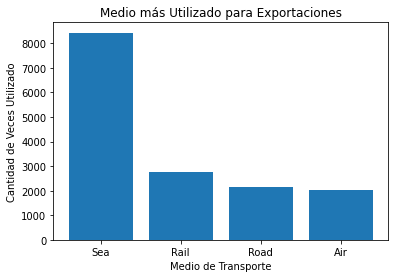

In [90]:
x_values = top_t_exportacion['transport_mode']
y_values = top_t_exportacion['total_value']
plt.bar(x_values, y_values)
plt.title('Medio más Utilizado para Exportaciones')
ax = plt.subplot()                   
ax.set_xticks(x_values)             
ax.set_xticklabels(x_values)       
ax.set_xlabel('Medio de Transporte')  
ax.set_ylabel('Cantidad de Veces Utilizado')
plt.show()
plt.close('all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


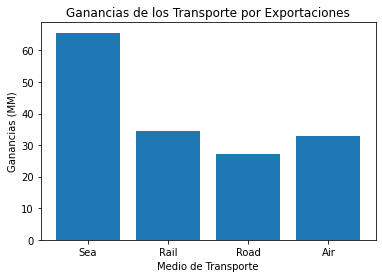

In [101]:
x_values = top_t_exportacion['transport_mode']
y_values = top_t_exportacion['ganancia_exportacion*10e-9']
plt.bar(x_values, y_values)
plt.title('Ganancias de los Transporte por Exportaciones')
ax = plt.subplot()                   
ax.set_xticks(x_values)             
ax.set_xticklabels(x_values)       
ax.set_xlabel('Medio de Transporte')  
ax.set_ylabel('Ganancias (MM)')
plt.show()
plt.close('all')

Importaciones

In [102]:
t_importacion = importacion.groupby(['transport_mode'])
top_t_importacion = t_exportacion.count()['total_value']
top_t_importacion = top_t_importacion.reset_index()
ganancia_importacion=t_importacion['total_value'].sum()
ganancia_importacion=ganancia_importacion.reset_index()
top_t_importacion['ganancia_importacion']=ganancia_importacion['total_value']
top_t_importacion['ganancia_importacion*10e-9']=round((top_t_importacion['ganancia_importacion']*0.000000001),2)
t_g_importacion=top_t_importacion['ganancia_importacion'].sum()
top_t_importacion=top_t_importacion.sort_values('total_value',ascending=False).head()
top_t_importacion

,transport_mode,total_value,ganancia_importacion,ganancia_importacion*10e-9
3,Sea,8434,34938000000,34.94
1,Rail,2780,9123000000,9.12
2,Road,2149,5990000000,5.99
0,Air,2045,5477000000,5.48


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


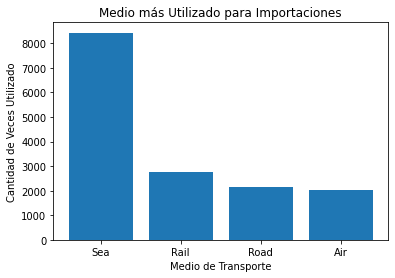

In [103]:
x_values = top_t_importacion['transport_mode']
y_values = top_t_importacion['total_value']
plt.bar(x_values, y_values)
plt.title('Medio más Utilizado para Importaciones')
ax = plt.subplot()                   
ax.set_xticks(x_values)             
ax.set_xticklabels(x_values)       
ax.set_xlabel('Medio de Transporte')  
ax.set_ylabel('Cantidad de Veces Utilizado')
plt.show()
plt.close('all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


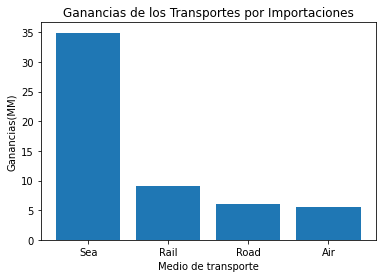

In [105]:
x_values = top_t_importacion['transport_mode']
y_values = top_t_importacion['ganancia_importacion*10e-9']
plt.bar(x_values, y_values)
plt.title('Ganancias de los Transportes por Importaciones')
ax = plt.subplot()                   
ax.set_xticks(x_values)             
ax.set_xticklabels(x_values)       
ax.set_xlabel('Medio de transporte')  
ax.set_ylabel('Ganancias(MM)')
plt.show()
plt.close('all')

Parte 3: Valor total de Exportaciones e Importaciones

Exportaciones

In [123]:
t_exp=exportacion['total_value'].sum()
g_exportacion = exportacion.groupby(['origin'])
g_exp= g_exportacion.sum()['total_value']
g_exp=g_exp.reset_index()
g_exp['porcentaje']=round((g_exp['total_value']/t_exp)*100,3)
g_exp=g_exp.sort_values('porcentaje',ascending=False).head(8)
g_exp['% acumulado']=g_exp.cumsum()['porcentaje']
g_exp.to_excel('VTotal_exportaciones.xlsx')
print('Los siguientes paises cubren alrededor del 82% de las Ganancias para Exportaciones')
g_exp


Los siguientes paises cubren alrededor del 82% de las Ganancias para Exportaciones


,origin,total_value,porcentaje,% acumulado
5,China,32977046000,20.590,20.590
6,France,18614332000,11.622,32.212
18,USA,18355306000,11.460,43.672
15,South Korea,14621146000,9.129,52.801
13,Russia,13223000000,8.256,61.057
10,Japan,11948976000,7.460,68.517
7,Germany,11343233000,7.082,75.599
4,Canada,10684000000,6.671,82.270


Importaciones

In [124]:
t_exp=importacion['total_value'].sum()
g_imp = importacion.groupby(['origin'])
g_imp= g_imp.sum()['total_value']
g_imp=g_imp.reset_index()
g_imp['porcentaje']=round((g_imp['total_value']/t_exp)*100,3)
g_imp=g_imp.sort_values('porcentaje',ascending=False).head(8)
g_imp['% acumulado']=g_imp.cumsum()['porcentaje']
g_imp.to_excel('VTotal_exportaciones.xlsx')
print('Los siguientes paises cubren alrededor del 82% de las Ganancias para Importaciones')
g_imp

Los siguientes paises cubren alrededor del 82% de las Ganancias para Importaciones


,origin,total_value,porcentaje,% acumulado
3,China,12233000000,22.030,22.030
7,Japan,8094000000,14.576,36.606
14,USA,5291000000,9.529,46.135
9,Mexico,4621000000,8.322,54.457
5,Germany,4250000000,7.654,62.111
11,Singapore,4017000000,7.234,69.345
12,South Korea,3889000000,7.004,76.349
8,Malaysia,3560000000,6.411,82.760
